***Cats vs Dogs***

In [ ]:
# benötigte Bibliotheken importieren

In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from random import shuffle
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras.callbacks import ModelCheckpoint

In [2]:
#Datensatz prüfen

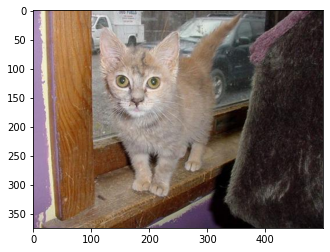

In [3]:
img = Image.open('Data/Cat/151.jpg')
img.load()
plt.imshow(img)
plt.show()

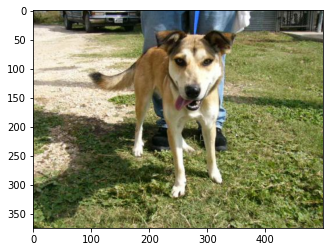

In [4]:
img = Image.open('Data/Dog/151.jpg')
img.load()
plt.imshow(img)
plt.show()

In [5]:
# Die Bilder scheinen korrekt zu sein

# Es fällt jedoch auf, dass sie unterschiedliche Auflösungen (Größen) besitzen

# Um ein Model trainieren zu können, müssen alle Bilder die gleiche Auflösung besitzen

# Es ist dabei jedoch nicht möglich die Auflösung eines Bildes zu erhöhen (außer mit anderen neuronalen Netzen)

# Je höher die Auflösung der Bilder beim Trainieren des Models ist, 
# desto mehr Arbeitsspeicher wird benötigt und desto länger braucht das Model zum trainieren

# Jedoch wirkt sich die Auflösung direkt auf die Genauigkeit des Models aus,
# d.h. je geringer die Auflösung, desto weniger Informationen hat das Bild und desto ungenauer wird das Model

# durch das Konvertieren des Bildes in ein Graustufen-Bild, kann ebenfalls der Speicherbedarf deutlich gesenkt werden,
# ohne dass relevante Informationen verloren gehen

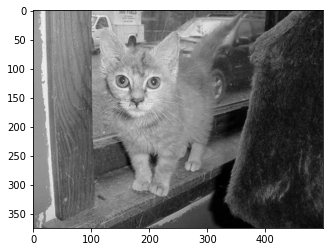

In [6]:
img = Image.open('Data/Cat/151.jpg').convert("I")
img.load()
plt.imshow(img)
plt.show()

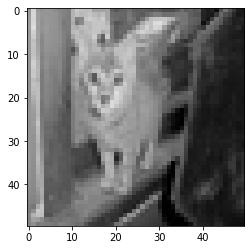

In [7]:
img = img.resize((50,50) , Image.LANCZOS)
plt.imshow(img)
plt.show()

In [8]:
# Es ist immernoch erkennbar, dass es sich um eine Katze handelt, jedoch gingen viele Informationen verloren

In [9]:
# das Model kann natürlich nicht mit Bild Objekten trainiert werden, 
# sondern wir müssen es vorher in Numpy Arrays umwandeln

In [10]:
data = np.asarray( img, dtype="int32" )
print(data)
print(data.shape)

[[150 211 154 ...  58  28  23]
 [154 215 158 ...  40  24  27]
 [156 212 158 ...  32  34  38]
 ...
 [135 178 193 ...  18  23  24]
 [130 161 156 ...  15  16  18]
 [131 143 121 ...  15  13  13]]
(50, 50)


In [11]:
# wie man sieht, spiegelt die Form des Arrays (50,50) genau die Auflösung wieder.
# Jedes Element im Array spiegelt ein Pixel im Bild wieder

In [12]:
# Um das Model trainieren zu können, fehlt jedoch noch eine Information, 
# die beim Umwandeln des Bildes in Graustufen verloren ging, nämlich die Anzahl der Farbkanäle
# diese beträgt bei einem Graustufen Bild 1

In [13]:
data = data.reshape((50,50,1))
print(data)
print(data.shape)

[[[150]
  [211]
  [154]
  ...
  [ 58]
  [ 28]
  [ 23]]

 [[154]
  [215]
  [158]
  ...
  [ 40]
  [ 24]
  [ 27]]

 [[156]
  [212]
  [158]
  ...
  [ 32]
  [ 34]
  [ 38]]

 ...

 [[135]
  [178]
  [193]
  ...
  [ 18]
  [ 23]
  [ 24]]

 [[130]
  [161]
  [156]
  ...
  [ 15]
  [ 16]
  [ 18]]

 [[131]
  [143]
  [121]
  ...
  [ 15]
  [ 13]
  [ 13]]]
(50, 50, 1)


In [14]:
# um das Model effizienter trainieren zu lassen müssen wir unsere Daten skalieren
# da jedes Pixel in einem Farbkanal eine Zahl zwischen 0 und 255 annehmen kann, reicht es hier aus durch 255 zu teilen
# um Zahlen zwischen 0 und 1 zu erhalten

In [15]:
data = data/255
print(data)
print(data.shape)

[[[0.58823529]
  [0.82745098]
  [0.60392157]
  ...
  [0.22745098]
  [0.10980392]
  [0.09019608]]

 [[0.60392157]
  [0.84313725]
  [0.61960784]
  ...
  [0.15686275]
  [0.09411765]
  [0.10588235]]

 [[0.61176471]
  [0.83137255]
  [0.61960784]
  ...
  [0.1254902 ]
  [0.13333333]
  [0.14901961]]

 ...

 [[0.52941176]
  [0.69803922]
  [0.75686275]
  ...
  [0.07058824]
  [0.09019608]
  [0.09411765]]

 [[0.50980392]
  [0.63137255]
  [0.61176471]
  ...
  [0.05882353]
  [0.0627451 ]
  [0.07058824]]

 [[0.51372549]
  [0.56078431]
  [0.4745098 ]
  ...
  [0.05882353]
  [0.05098039]
  [0.05098039]]]
(50, 50, 1)


In [16]:
# jetzt sind unsere Daten im richtigen Format
# diese Schritte müssen nur noch für jedes andere Bild vorgenommen werden

In [17]:
# vorher müssen wir jedoch erst festlegen, was ein Hund und was eine Katze ist
# Dieser Prozess nennt sich Labeling

In [70]:
def labeling(label):
    if(label == "Cat"):
        return 0

    elif(label == "Dog"):
        return 1

In [71]:
# diese Funktion wird aufgerufen und gibt dann 0 (Katze) oder 1 (Hund) zurück

In [72]:
# alle Katzenbilder importieren und Umwandeln

In [73]:
def preprocessing(img,dir):
    img = Image.open(f"{dir}/{img}").convert("I")
    #img = Image.open(f"{dir}/{img}")
    img.load()
    img = img.resize((100,100), Image.LANCZOS)
    data = np.asarray( img, dtype="int32" )
    data = data.reshape((100,100,1))
    data = data/255
    return data

In [74]:
cat_data = []

Cats_dir = "Data/Cat"
for img in os.listdir(Cats_dir):
    try:
        data = preprocessing(img,Cats_dir)
        label = "Cat"
        target = labeling(label)
        cat_data.append([data,np.array(target)])
    except:
        continue

In [75]:
# alle Hundebilder importieren und Umwandeln

In [76]:
dog_data = []
Dogs_dir = "Data/Dog"
for img in os.listdir(Dogs_dir):
    try:
        data = preprocessing(img,Dogs_dir)
        label = "Dog"
        target = labeling(label)
        dog_data.append([data,np.array(target)])
    except:
        continue

c:\users\test\appdata\local\programs\python\python38\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EX

In [77]:
# um ein Ungleichgewicht beim Trainieren zu verhindern sollten alle Features auch gleich viele Bilder enthalten

In [78]:
print(len(cat_data))
print(len(dog_data))

12348
12342


In [79]:
# es sind nicht gleich viele Bilder vorhanden

In [80]:
min_len = min(len(cat_data),len(dog_data))
print(min_len)

12342


In [81]:
cat_data = cat_data[:min_len]
dog_data = dog_data[:min_len]
print(len(cat_data))
print(len(dog_data))

12342
12342


In [82]:
# jetzt haben beide Datensätze gleich viele Bilder
# die Datensätze müssen nun aufgeteilt werden in Validierungsdaten und Trainingsdaten
# hier werden 70% der Daten zum Trainieren und 30% zum Validieren genutzt

In [83]:
train_max = int(0.7 * min_len)
print(train_max)

8639


In [84]:
cat_train = cat_data[:train_max]
cat_val = cat_data[train_max:]
dog_train = dog_data[:train_max]
dog_val = dog_data[train_max:]

In [85]:
# jetzt können alle Trainings und Validierungsdaten zusammen in eine Liste gepackt werden

In [86]:
training_data = cat_train + dog_train
validation_data = cat_val + dog_val

In [87]:
# Daten mischen

In [88]:
shuffle(training_data)
shuffle(validation_data)

In [89]:
# Numpy Array aus allen Einzeldaten

In [90]:
X = np.array([i[0] for i in training_data])
Y = np.array([i[1] for i in training_data])
val_x = np.array([i[0] for i in validation_data])
val_y = np.array([i[1] for i in validation_data])

print(X)
print(Y)

[[[[1.        ]
   [1.        ]
   [1.        ]
   ...
   [0.99607843]
   [1.        ]
   [0.99607843]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [0.99607843]
   [1.        ]
   [0.99607843]]

  [[1.        ]
   [1.        ]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99215686]]

  ...

  [[0.61960784]
   [0.65098039]
   [0.6627451 ]
   ...
   [0.70980392]
   [0.69411765]
   [0.66666667]]

  [[0.61568627]
   [0.64313725]
   [0.64313725]
   ...
   [0.69019608]
   [0.6745098 ]
   [0.6627451 ]]

  [[0.59607843]
   [0.63137255]
   [0.62745098]
   ...
   [0.6627451 ]
   [0.64313725]
   [0.65490196]]]


 [[[0.28235294]
   [0.30980392]
   [0.22745098]
   ...
   [0.4745098 ]
   [0.49411765]
   [0.51372549]]

  [[0.28235294]
   [0.30980392]
   [0.2627451 ]
   ...
   [0.46666667]
   [0.49803922]
   [0.52941176]]

  [[0.29411765]
   [0.30588235]
   [0.29019608]
   ...
   [0.51372549]
   [0.5254902 ]
   [0.52941176]]

  ...

  [[0.48627451]
   [0.51372549]
   [0.5

In [91]:
# Hyperparameter setzen

In [92]:
epoch = 100
num_filters= 7
filter_size = 4
pool_size = 2
DROP = 0.2
DECAY = 1e-5
LR = 0.001

In [93]:
#Model bilden

In [100]:
model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(100,100,1), padding="same"),
    Conv2D(num_filters, filter_size, padding="same",activation="relu"),
    MaxPooling2D(pool_size=pool_size, padding="same"),
    Conv2D(num_filters, filter_size, padding="same",activation="relu"),
    Dropout(DROP),
    MaxPooling2D(pool_size=pool_size, padding="same"),
    Conv2D(num_filters, filter_size, padding="same",activation="relu", name="test"),
    Flatten(),

    Dense(2, activation='softmax'),
])
for i, layer in enumerate(model.layers):
    print(layer.name)

conv2d_6
conv2d_7
max_pooling2d_4
conv2d_8
dropout_2
max_pooling2d_5
test
flatten_2
dense_2


In [101]:
# optimzier-Methode, loss-Methode und Speicherorte festlegen

In [102]:
opt = tf.keras.optimizers.Adam(lr=LR, decay=DECAY)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"]
              )

NAME = f"test-{int(time.time())}"
model.save_weights(f"Models/{NAME}-weights.h5")
tensorboard = TensorBoard(log_dir='Logs/{}/'.format(NAME))

filepath = f"num{num_filters}-size{filter_size}-pool{pool_size}-"+"{epoch:02d}"  # unique file name that will include the epoch and the validation acc for that epoch
checkpoint = ModelCheckpoint("Models/{}.model".format(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')) # saves only the best ones

In [103]:
from tensorflow import keras
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(logs
            )



In [104]:
#Training starten

In [105]:
history = model.fit(
    X, Y,
    epochs=epoch,
    validation_data=(val_x,val_y),
    callbacks = [tensorboard, checkpoint,CustomCallback()]
)

Epoch 1/100
540/540 [==============================] - ETA: 0s - loss: 0.6447 - accuracy: 0.6184INFO:tensorflow:Assets written to: Models\num7-size4-pool2-01.model\assets
{'loss': 0.6446923613548279, 'accuracy': 0.6184164881706238, 'val_loss': 0.6225263476371765, 'val_accuracy': 0.6552795171737671}
540/540 [==============================] - 8s 15ms/step - loss: 0.6447 - accuracy: 0.6184 - val_loss: 0.6225 - val_accuracy: 0.6553
Epoch 2/100
537/540 [============================>.] - ETA: 0s - loss: 0.5688 - accuracy: 0.7090INFO:tensorflow:Assets written to: Models\num7-size4-pool2-02.model\assets
{'loss': 0.5679917335510254, 'accuracy': 0.7095728516578674, 'val_loss': 0.5531579852104187, 'val_accuracy': 0.7206318974494934}
540/540 [==============================] - 7s 12ms/step - loss: 0.5680 - accuracy: 0.7096 - val_loss: 0.5532 - val_accuracy: 0.7206
Epoch 3/100
539/540 [============================>.] - ETA: 0s - loss: 0.5260 - accuracy: 0.7435INFO:tensorflow:Assets written to: Model

{'loss': 0.3100876808166504, 'accuracy': 0.8636994957923889, 'val_loss': 0.49961256980895996, 'val_accuracy': 0.7758573889732361}
540/540 [==============================] - 7s 12ms/step - loss: 0.3101 - accuracy: 0.8637 - val_loss: 0.4996 - val_accuracy: 0.7759
Epoch 20/100
537/540 [============================>.] - ETA: 0s - loss: 0.3089 - accuracy: 0.8645INFO:tensorflow:Assets written to: Models\num7-size4-pool2-20.model\assets
{'loss': 0.3091525435447693, 'accuracy': 0.8643940091133118, 'val_loss': 0.5237228274345398, 'val_accuracy': 0.7743721604347229}
540/540 [==============================] - 7s 12ms/step - loss: 0.3092 - accuracy: 0.8644 - val_loss: 0.5237 - val_accuracy: 0.7744
Epoch 21/100
540/540 [==============================] - ETA: 0s - loss: 0.3045 - accuracy: 0.8681INFO:tensorflow:Assets written to: Models\num7-size4-pool2-21.model\assets
{'loss': 0.3044703006744385, 'accuracy': 0.8680981397628784, 'val_loss': 0.5143153071403503, 'val_accuracy': 0.775047242641449}
540/5

KeyboardInterrupt: 

In [ ]:
# während und nach dem Training können die Logfiles mithilfe von Tensorboard ausgewertet werden

In [ ]:
# Das trainierte Model kann nun benutzt werden um eigene Bilder zu analysieren
# dafür muss das eigene Bild auch erst wieder in das richtige Format gebracht werden

In [ ]:
path_to_img = 'Data/Cat/151.jpg' #Pfad zum Bild angeben
img = Image.open(path_to_img).convert("I")
img.load()
img = img.resize((100,100), Image.LANCZOS)
data = np.asarray( img, dtype="int32" )

plt.imshow(data)
plt.show()

data = data.reshape((1,100,100,1))
data = data/255

In [ ]:
#trainiertes Model laden

In [ ]:
# path_to_model="" #Pfad zum Model angeben
# model = tf.keras.models.load_model(path_to_model)

In [ ]:
# Model benutzen
# Der Output entspricht der Sicherheit des Models für den jeweiligen Index
# Den Index haben wir beim Labeling festgelegt

In [ ]:
prediction = model.predict([[data]])
print(prediction)

In [ ]:
# mit argmax wird der Index isoliert ausgegeben

In [ ]:
print(np.argmax(prediction))

In [ ]:
# Die Zahl können wir auch wieder in einen String umwandeln lassen

In [48]:
def backwards_labeling(Output_Model):
    if Output_Model == 0:
        return "Cat"
    if Output_Model ==1:
        return "Dog" 

In [ ]:
print(backwards_labeling(np.argmax(prediction)))

In [49]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()
            
    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
        
    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output,
                self.model.output])
                # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
                # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
               # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        return heatmap
    
    def overlay_heatmap(self, heatmap, image, alpha=0.5,colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

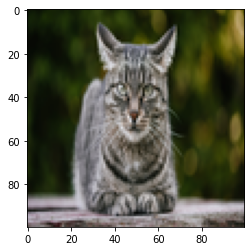

Cat


In [54]:

import numpy as np
import imutils
import cv2



path_to_test_img = os.path.join("Data", "validate", "3.jpg")
#path_to_test_img = 'Data/Cat/1057.jpg' 

img = Image.open(path_to_test_img)
img.load()
img = img.resize((100,100), Image.LANCZOS)
data = np.asarray( img, dtype="int32" )

plt.imshow(data)
plt.show()

data = data.reshape((1,100,100,1))
test_data = data/255


orig = cv2.imread(path_to_test_img)
# use the network to make predictions on the input image and find
# the class label index with the largest corresponding probability
preds = model.predict(test_data)
i = np.argmax(preds[0])
# decode the ImageNet predictions to obtain the human-readable label

label = backwards_labeling(np.argmax(preds))
print(label)
# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(test_data)
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

# draw the predicted label on the output image
# cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
# cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
# 	0.8, (255, 255, 255), 2)
# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])
output = imutils.resize(output, height=700)
cv2.imshow("Output", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [106]:
import shap

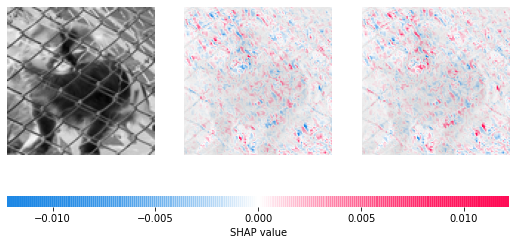

In [111]:
background = X[np.random.choice(X.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(val_x[201:202])

# plot the feature attributions
shap.image_plot(shap_values, -val_x[201:202])

In [57]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [66]:
img_to_watch = 100

Cat


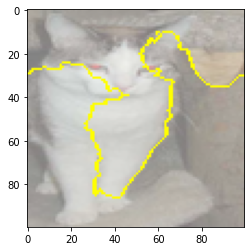

In [67]:
explainer = lime_image.LimeImageExplainer()
test_img = X[img_to_watch]
test_img = test_img.reshape((1,100,100,3))
print(backwards_labeling(np.argmax(model.predict(test_img))))
explanation = explainer.explain_instance(X[img_to_watch].astype('double'), model.predict, top_labels=2, hide_color=0, num_samples=1000)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False,num_features=5)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


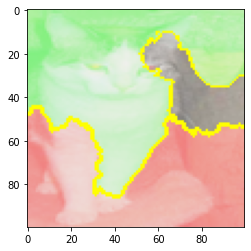

In [68]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

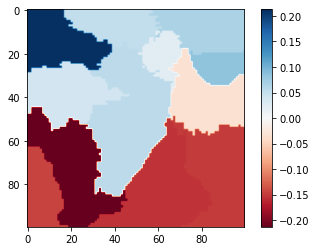

In [69]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()